# Machine Learning Credit Risk project 

### Business Understanding

Financial markets are fundamental institutions in any developing economy. They play a crucial role in promoting economic growth by facilitating the channeling of saving decisions into productive investment. A major concern for financial institutions is credit risk, because if not managed properly, it can lead to a banking collapse. 

In our banking system, banks have many products to sell but the main source of income of any bank is on its credit line. Loan is the core business part of banks. A bank's profit or a loss depends to a large extent on loans i.e. whether the customers are paying back the loan or defaulting. 

Though a lot of people are applying for loans. However, they may have some difficulty in repaying the loan, due to their own capability to repay loan, their personal monetary terms, etc.. It’s hard to select the genuine applicant, who will repay the loan. While doing the process manually, a lot of misconception may happen to select the genuine applicant. The banks hold the risk of losing the amount loaned to the borrowers, which is basically regarded as "Credit risk". 

Credit risk is the potential that a bank’s borrower or counterparty fails to meet its obligations in repaying the loan borrowed from the financial institutions ("banks").

By predicting the loan defaulters, the bank can reduce its Non-Performing Assets. This makes the study of this phenomenon very important. 

Thus, the banks need to manage the credit risks in their portfolio both at the individual borrower and transactional level, as well as to consider the linkage between credit risks and other types of risk. This is because these are criteria to assess the success/failure of any banking lending activities.

Many research confirmed that machine learning technology is highly efficient to predict this situation. This technique is applied through learning from previous data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("credit_risk_dataset.csv")

In [3]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

# Removing null values 

In [6]:
print(df["person_emp_length"].mean())
print(df["loan_int_rate"].mean())

4.789686296787225
11.01169489224439


In [7]:
df["person_emp_length"] = df["person_emp_length"].replace(np.nan , df["person_emp_length"].mean())

In [8]:
df["loan_int_rate"] = df["loan_int_rate"].replace(np.nan , df["loan_int_rate"].mean())

In [9]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [10]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


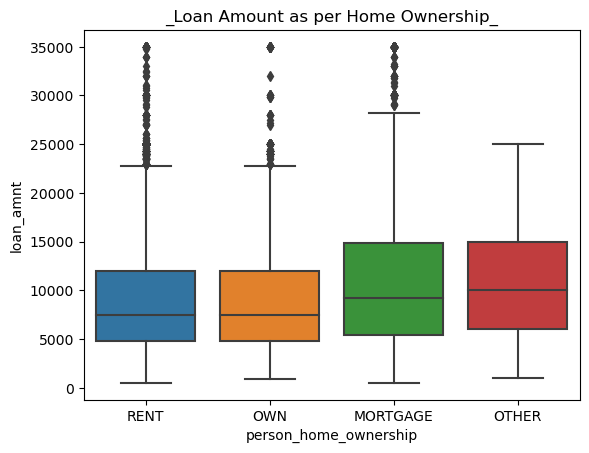

In [58]:
sns.boxplot( x=df["person_home_ownership"], y=df["loan_amnt"] )
plt.title("_Loan Amount as per Home Ownership_")
plt.show()

### Loan intent 

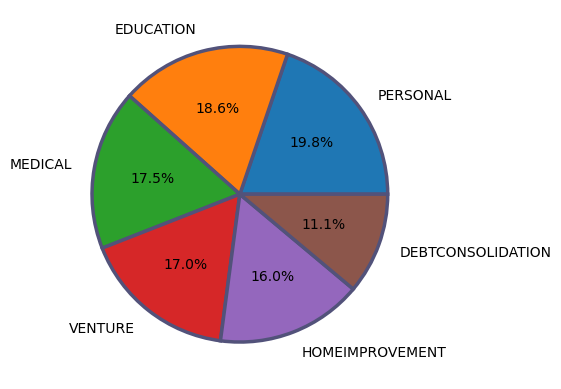

In [66]:
plt.pie(df['loan_intent'].value_counts() , labels=df['loan_intent'].unique(),autopct="%.1f%%", labeldistance=1.15, wedgeprops = { 'linewidth' : 2.5, 'edgecolor' : '#52527a' });

### Person age

In [71]:
df['person_age'].describe()

count    32416.000000
mean        27.747008
std          6.354100
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64

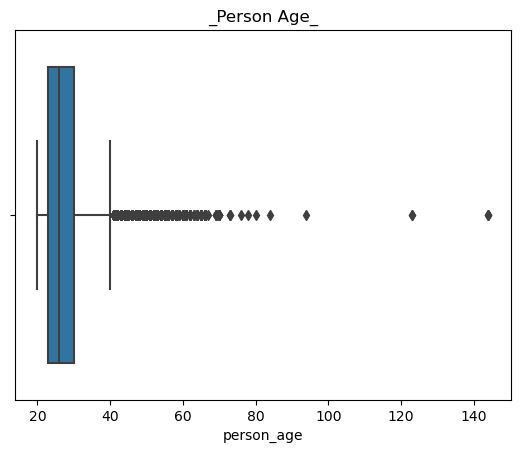

In [68]:
sns.boxplot(x='person_age',data=df)
plt.title("_Person Age_")
plt.show()

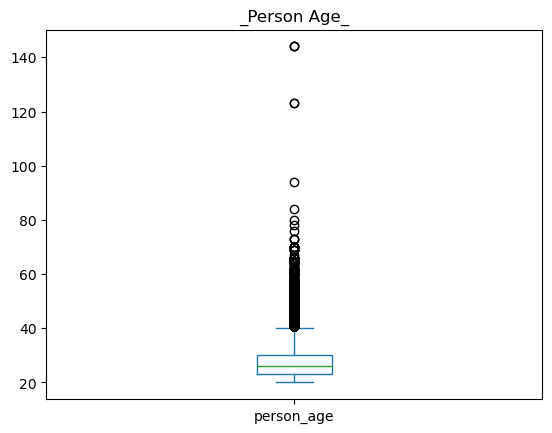

In [13]:
df['person_age'].plot(kind = 'box')
plt.title("_Person Age_")
plt.show()

### Person income

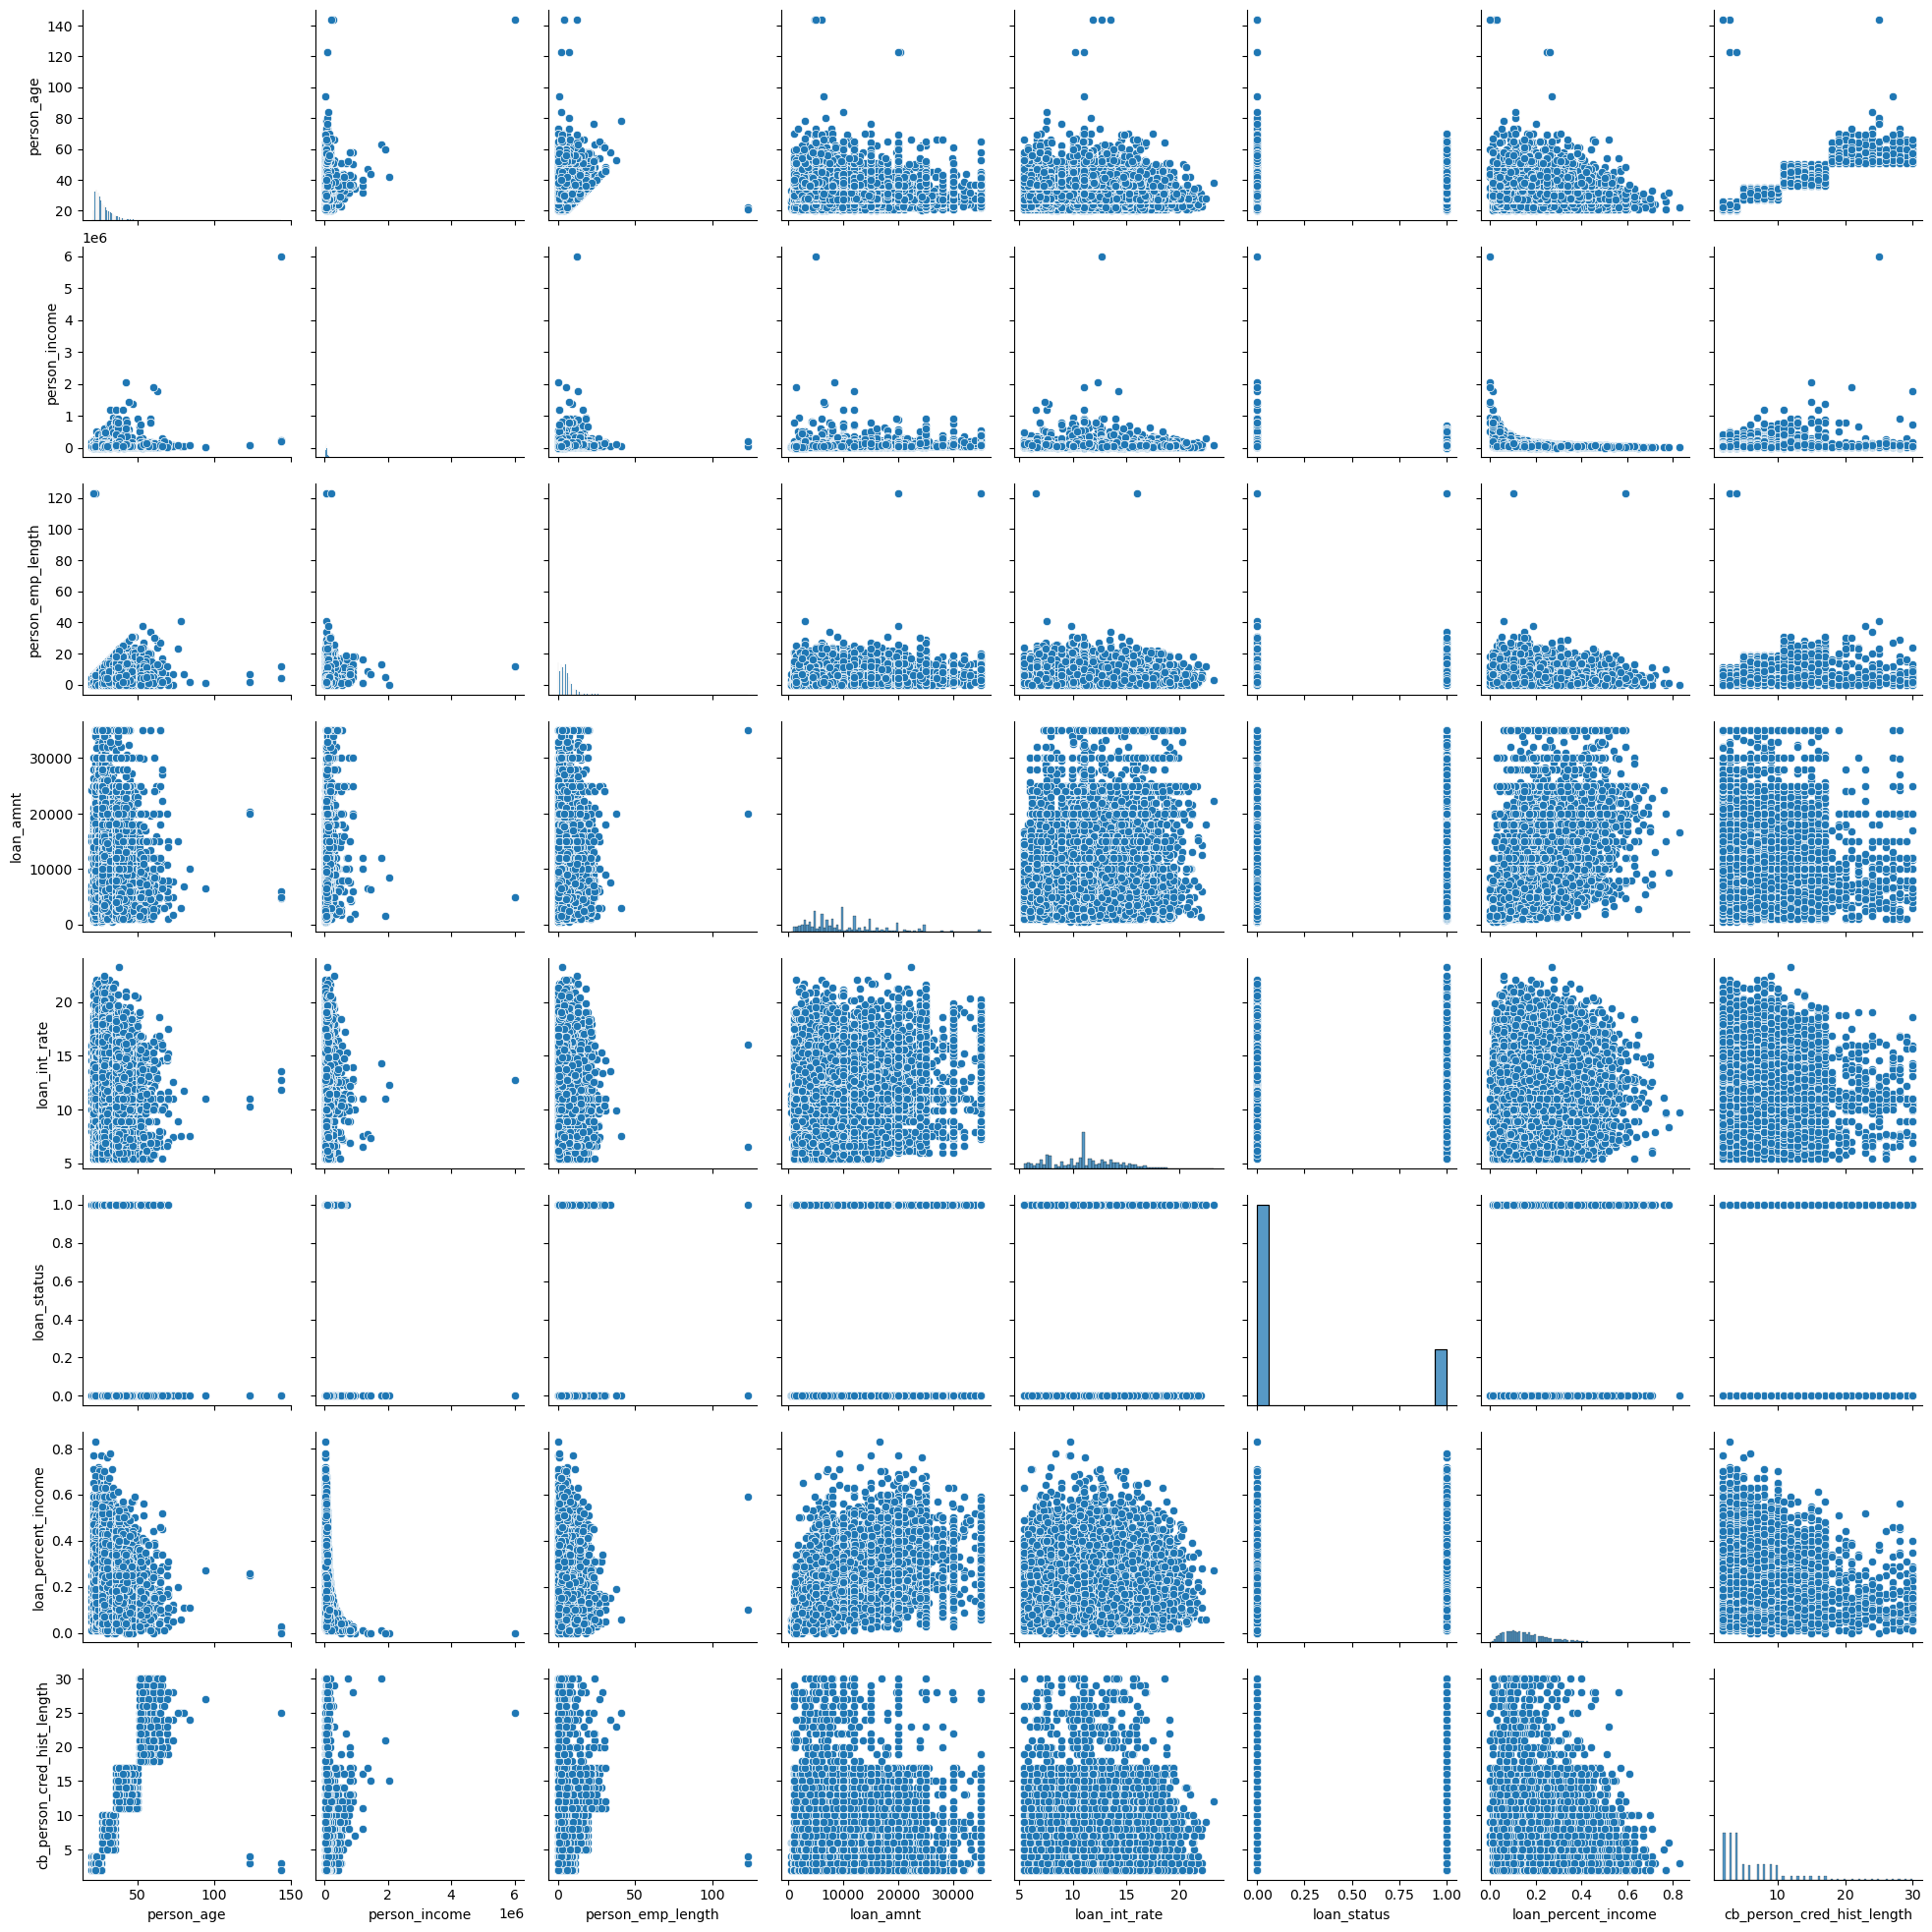

In [70]:
sns.pairplot(df)
plt.show()

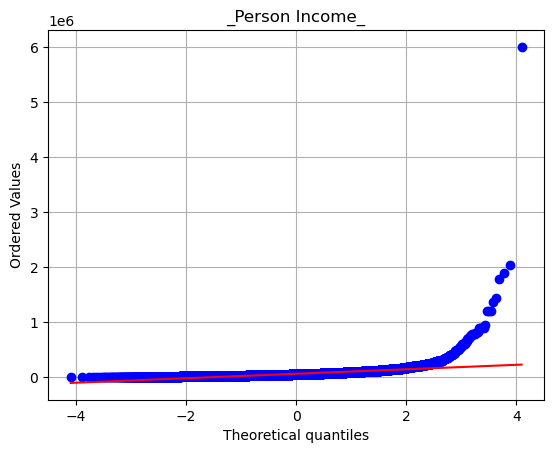

In [14]:
stats.probplot(df['person_income'],dist='norm',plot=plt)
plt.grid()
plt.title("_Person Income_")
plt.show()

### Person home ownership 

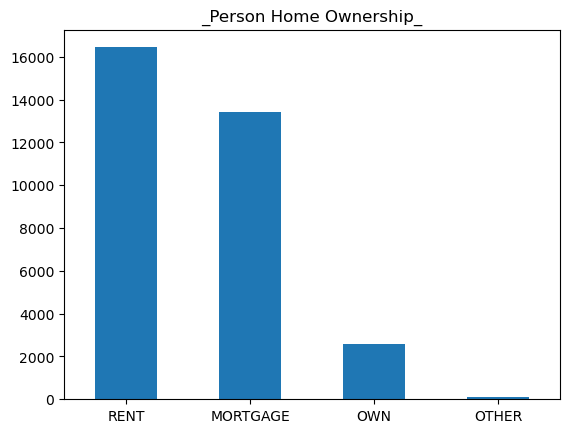

In [15]:
df['person_home_ownership'].value_counts().plot(kind = 'bar')
plt.xticks(rotation=0)
plt.title("_Person Home Ownership_")
plt.show()

### CB Person Default on File

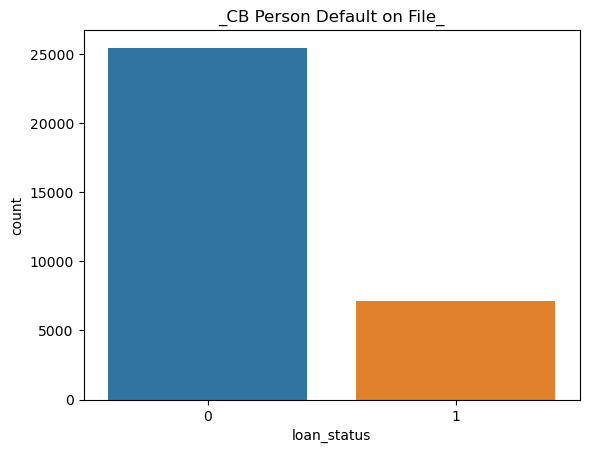

In [16]:
sns.countplot(x='loan_status', data=df)
plt.title("_CB Person Default on File_")
plt.show()

In [18]:
df["person_home_ownership"].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [19]:
df['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

# Finding and Droping Duplicates

In [20]:
df[df.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.990000,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.360000,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.420000,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.900000,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.880000,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.420000,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.880000,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.990000,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.370000,0,0.03,N,16


In [21]:
df = df.drop_duplicates()

In [22]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Train and Test / Preprocessing

In [23]:
X = df.drop(columns="loan_status")

In [24]:
y = df["loan_status"]

In [25]:
X_train ,X_test ,Y_train ,Y_test = train_test_split(X , y , test_size=0.25 , random_state=100)

In [26]:
X_train.shape

(24312, 11)

In [27]:
Y_test.shape

(8104,)

# X_train  

In [28]:
X_train_obj = X_train.select_dtypes(["object"])
X_train_int = X_train.select_dtypes(["int" , "float"])

In [29]:
X_train_obj

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
17995,RENT,MEDICAL,C,N
14771,MORTGAGE,PERSONAL,A,N
31533,MORTGAGE,EDUCATION,C,Y
4075,RENT,EDUCATION,D,Y
9221,RENT,PERSONAL,C,Y
...,...,...,...,...
12119,MORTGAGE,HOMEIMPROVEMENT,A,N
24545,RENT,PERSONAL,B,N
14147,MORTGAGE,PERSONAL,A,N
23442,OWN,VENTURE,C,Y


In [30]:
X_train_int

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
17995,28,60000,3.0,25000,13.49,0.42,10
14771,25,115000,9.0,4000,6.03,0.03,4
31533,39,101000,17.0,2500,13.47,0.02,17
4075,23,80000,3.0,4000,14.46,0.05,4
9221,23,21600,5.0,5000,13.06,0.23,4
...,...,...,...,...,...,...,...
12119,24,80000,8.0,18000,7.90,0.23,2
24545,35,60000,7.0,10000,11.11,0.17,9
14147,23,100000,0.0,7000,8.59,0.07,3
23442,31,62500,0.0,3000,13.92,0.05,5


In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
oe = OneHotEncoder(drop='first' , sparse_output=False)

In [33]:
X_train_obj_oe = pd.DataFrame(oe.fit_transform(X_train_obj), index=X_train_obj.index , columns=oe.get_feature_names_out())

In [34]:
X_train_obj_oe

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
17995,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14771,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31533,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4075,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9221,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24545,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14147,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23442,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [35]:
set_config(transform_output='pandas')

In [36]:
sc=StandardScaler()
mx=MinMaxScaler()

In [37]:
X_train_int_sc = pd.DataFrame(sc.fit_transform(X_train_int) ,index = X_train_int.index , columns = X_train_int.columns)

In [38]:
X_train_int_sc

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
17995,0.044124,-0.096366,-0.442051,2.460002,0.801809,2.345884,1.041871
14771,-0.436782,0.765705,1.037800,-0.880320,-1.611000,-1.304752,-0.446843
31533,1.807446,0.546268,3.010935,-1.118914,0.795341,-1.398358,2.778704
4075,-0.757386,0.217114,-0.442051,-0.880320,1.115539,-1.117540,-0.446843
9221,-0.757386,-0.698248,0.051233,-0.721257,0.662733,0.567369,-0.446843
...,...,...,...,...,...,...,...
12119,-0.597084,0.217114,0.791158,1.346561,-1.006181,0.567369,-0.943081
24545,1.166238,-0.096366,0.544516,0.074058,0.032039,0.005733,0.793752
14147,-0.757386,0.530594,-1.181976,-0.403131,-0.783012,-0.930328,-0.694962
23442,0.525030,-0.057181,-1.181976,-1.039383,0.940885,-1.117540,-0.198724


In [39]:
X_train_processed = X_train_int_sc.merge(X_train_obj_oe , left_index = True , right_index = True)

In [40]:
X_train_processed

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
17995,0.044124,-0.096366,-0.442051,2.460002,0.801809,2.345884,1.041871,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14771,-0.436782,0.765705,1.037800,-0.880320,-1.611000,-1.304752,-0.446843,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31533,1.807446,0.546268,3.010935,-1.118914,0.795341,-1.398358,2.778704,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4075,-0.757386,0.217114,-0.442051,-0.880320,1.115539,-1.117540,-0.446843,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9221,-0.757386,-0.698248,0.051233,-0.721257,0.662733,0.567369,-0.446843,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,-0.597084,0.217114,0.791158,1.346561,-1.006181,0.567369,-0.943081,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24545,1.166238,-0.096366,0.544516,0.074058,0.032039,0.005733,0.793752,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14147,-0.757386,0.530594,-1.181976,-0.403131,-0.783012,-0.930328,-0.694962,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23442,0.525030,-0.057181,-1.181976,-1.039383,0.940885,-1.117540,-0.198724,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# X_test 

In [41]:
X_test_obj = X_test.select_dtypes(["object"])
X_test_int = X_test.select_dtypes(["int" , "float"])

In [42]:
X_test_obj

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
25666,RENT,HOMEIMPROVEMENT,B,N
18151,MORTGAGE,PERSONAL,C,Y
24159,MORTGAGE,MEDICAL,A,N
57,OWN,PERSONAL,A,N
9770,RENT,MEDICAL,C,N
...,...,...,...,...
11553,RENT,DEBTCONSOLIDATION,A,N
26413,MORTGAGE,MEDICAL,C,N
12689,MORTGAGE,PERSONAL,A,N
10142,RENT,EDUCATION,B,N


In [43]:
X_test_int

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
25666,33,110000,3.0,12000,10.650000,0.11,5
18151,31,170000,15.0,10000,13.490000,0.06,8
24159,31,70000,4.0,12000,6.910000,0.17,7
57,23,277000,3.0,35000,11.011695,0.13,4
9770,22,25920,1.0,9000,10.590000,0.35,2
...,...,...,...,...,...,...,...
11553,26,65520,3.0,10000,7.510000,0.15,4
26413,35,100843,6.0,2800,12.870000,0.03,5
12689,22,84600,4.0,6000,11.011695,0.07,4
10142,21,28800,1.0,9600,10.370000,0.33,3


In [44]:
X_test_obj_oe = pd.DataFrame(oe.fit_transform(X_test_obj) , index = X_test_obj.index , columns = oe.get_feature_names_out())

In [45]:
X_test_obj_oe

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
25666,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18151,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
24159,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9770,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11553,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26413,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12689,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10142,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
X_test_int_sc = pd.DataFrame(sc.fit_transform(X_test_int), index = X_test_int.index , columns = X_test_int.columns)

In [47]:
X_test_int_sc

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
25666,0.775347,0.782632,-0.426222,0.346716,-0.125680,-0.588871,-0.203309
18151,0.476343,1.847973,2.438953,0.035460,0.803561,-1.057442,0.520707
24159,0.476343,0.072406,-0.187458,0.346716,-1.349399,-0.026586,0.279368
57,-0.719671,3.747829,-0.426222,3.926161,-0.007334,-0.401443,-0.444648
9770,-0.869173,-0.710264,-0.903751,-0.120168,-0.145312,1.660271,-0.927326
...,...,...,...,...,...,...,...
11553,-0.271166,-0.007140,-0.426222,0.035460,-1.153080,-0.214014,-0.444648
26413,1.074351,0.620044,0.290071,-1.085061,0.600698,-1.338585,-0.203309
12689,-0.869173,0.331638,-0.187458,-0.587052,-0.007334,-0.963728,-0.444648
10142,-1.018675,-0.659128,-0.903751,-0.026791,-0.217295,1.472842,-0.685987


In [48]:
X_test_processed = X_test_int_sc.merge(X_test_obj_oe , left_index = True , right_index = True)

In [49]:
X_test_processed

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
25666,0.775347,0.782632,-0.426222,0.346716,-0.125680,-0.588871,-0.203309,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18151,0.476343,1.847973,2.438953,0.035460,0.803561,-1.057442,0.520707,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
24159,0.476343,0.072406,-0.187458,0.346716,-1.349399,-0.026586,0.279368,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,-0.719671,3.747829,-0.426222,3.926161,-0.007334,-0.401443,-0.444648,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9770,-0.869173,-0.710264,-0.903751,-0.120168,-0.145312,1.660271,-0.927326,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11553,-0.271166,-0.007140,-0.426222,0.035460,-1.153080,-0.214014,-0.444648,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26413,1.074351,0.620044,0.290071,-1.085061,0.600698,-1.338585,-0.203309,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12689,-0.869173,0.331638,-0.187458,-0.587052,-0.007334,-0.963728,-0.444648,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10142,-1.018675,-0.659128,-0.903751,-0.026791,-0.217295,1.472842,-0.685987,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
X_train_processed

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
17995,0.044124,-0.096366,-0.442051,2.460002,0.801809,2.345884,1.041871,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14771,-0.436782,0.765705,1.037800,-0.880320,-1.611000,-1.304752,-0.446843,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31533,1.807446,0.546268,3.010935,-1.118914,0.795341,-1.398358,2.778704,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4075,-0.757386,0.217114,-0.442051,-0.880320,1.115539,-1.117540,-0.446843,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9221,-0.757386,-0.698248,0.051233,-0.721257,0.662733,0.567369,-0.446843,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,-0.597084,0.217114,0.791158,1.346561,-1.006181,0.567369,-0.943081,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24545,1.166238,-0.096366,0.544516,0.074058,0.032039,0.005733,0.793752,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14147,-0.757386,0.530594,-1.181976,-0.403131,-0.783012,-0.930328,-0.694962,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23442,0.525030,-0.057181,-1.181976,-1.039383,0.940885,-1.117540,-0.198724,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [51]:
from sklearn import metrics

### Logistic Regeression 

In [72]:
lr = LogisticRegression()
lr.fit(X_train_processed,Y_train)
Y_test_pred_lr = lr.predict(X_test_processed)
lr = metrics.accuracy_score(Y_test, Y_test_pred_lr)

 ## KNN 

In [53]:
classifier = KNeighborsClassifier()
classifier.fit(X_train_processed , Y_train)
Y_test_pred_knn = classifier.predict(X_test_processed)

metrics.accuracy_score(Y_test , Y_test_pred_knn)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

## Decision Tree Classifier 

In [73]:
dt = DecisionTreeClassifier()
dt.fit(X_train_processed, Y_train)
Y_test_pred_dt = dt.predict(X_test_processed)
dt = metrics.accuracy_score(Y_test, Y_test_pred_dt)

## Random Forest Classifier

In [74]:
rfc = RandomForestClassifier()
rfc.fit(X_train_processed, Y_train)
Y_test_pred_rfc = rfc.predict(X_test_processed)
rfc = metrics.accuracy_score(Y_test, Y_test_pred_rfc)

## svc 

In [75]:
svc= SVC()
svc.fit(X_train_processed, Y_train)
Y_test_pred_svc = svc.predict(X_test_processed)
svc = metrics.accuracy_score(Y_test, Y_test_pred_svc)

In [117]:
dic = {"Name":["Random Forest","SVC","Decision Tree","Logistic Regression"] , "Values":[rfc,svc,dt,lr]}
df2 = pd.DataFrame(dic)

In [118]:
df2

,Name,Values
0,Random Forest,0.911772
1,SVC,0.908440
2,Decision Tree,0.852542
3,Logistic Regression,0.863648


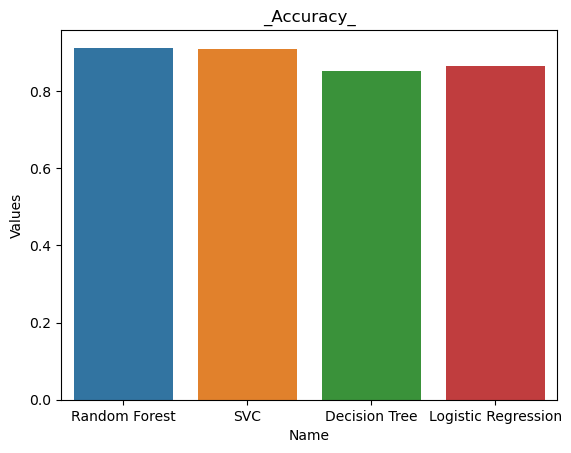

In [112]:
sns.barplot(x='Name', y='Values', data=df2)
plt.title("_Accuracy_")
plt.xticks(rotation = 0)
plt.show()